In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime


#
# Add some more models and visualizations
#
#
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sb
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import metrics
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')



In [6]:
symbol = "NVDA"
stock = yf.Ticker(symbol)
df = stock.history(period="5y")
df.reset_index(inplace=True)

In [7]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-04-23 00:00:00-04:00,7.169586,7.301599,7.049030,7.074187,424160000,0.0,0.0
1,2020-04-24 00:00:00-04:00,7.063975,7.215167,6.989250,7.213175,352328000,0.0,0.0
2,2020-04-27 00:00:00-04:00,7.347679,7.559648,7.323020,7.399737,479388000,0.0,0.0
3,2020-04-28 00:00:00-04:00,7.547193,7.577084,7.251782,7.257262,442904000,0.0,0.0
4,2020-04-29 00:00:00-04:00,7.392016,7.486916,7.316793,7.434111,379160000,0.0,0.0
...,...,...,...,...,...,...,...,...
1251,2025-04-15 00:00:00-04:00,110.970001,113.620003,110.500000,112.199997,228966900,0.0,0.0
1252,2025-04-16 00:00:00-04:00,104.550003,106.790001,100.449997,104.489998,397016900,0.0,0.0
1253,2025-04-17 00:00:00-04:00,104.449997,104.470001,100.050003,101.489998,290833400,0.0,0.0
1254,2025-04-21 00:00:00-04:00,98.769997,99.440002,95.040001,96.910004,288501100,0.0,0.0


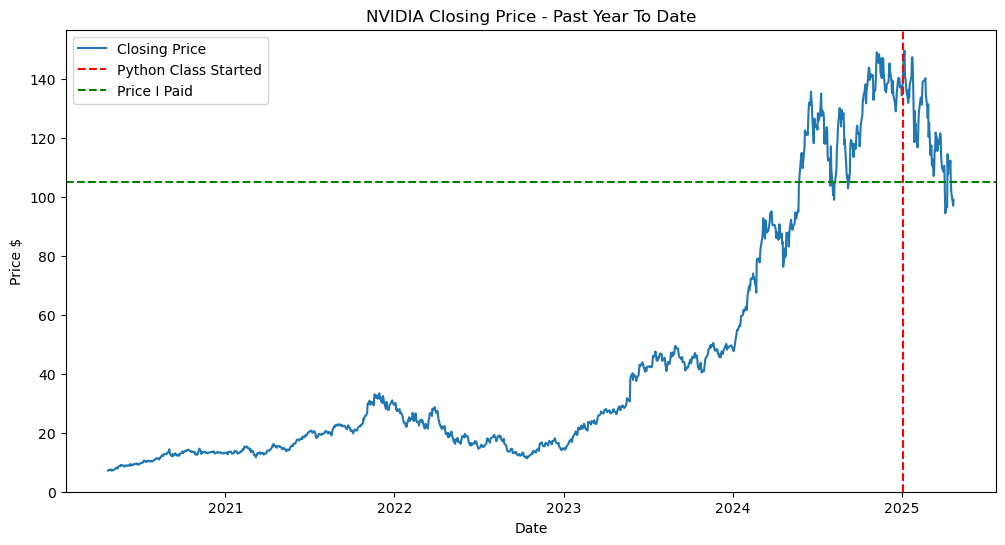

In [8]:
classbegan = datetime.datetime(2025, 1,3 )
mypurchaseprice = 105.0
plt.figure(figsize=(12, 6 ) )
plt.plot( df['Date'], df['Close'], label='Closing Price')

plt.axvline( classbegan, color='red', label=("Python Class Started"), linestyle='--')
plt.axhline( mypurchaseprice, color='green', label=("Price I Paid"), linestyle='--')


plt.title("NVIDIA Closing Price - Past Year To Date")
plt.xlabel("Date")
plt.ylabel("Price $")
plt.legend()
plt.show()


In [9]:
X = pd.to_datetime(df['Date']).map(pd.Timestamp.timestamp).values.reshape(-1, 1)
Y = df['Close'].values.reshape(-1, 1)                                                     



In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42 )

modellr = LinearRegression()
modellr.fit(X, Y)


predictions = modellr.predict(X)





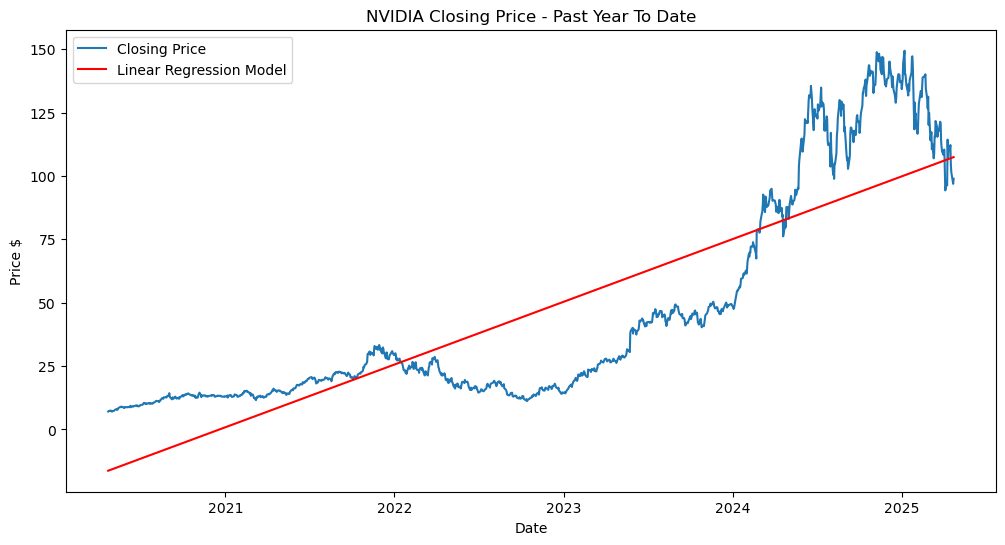

In [11]:
#
# Plot the Linear Regression, showing the actual vs predicted!
#
#

plt.figure(figsize=(12, 6 ) )
plt.plot( df['Date'], df['Close'], label='Closing Price')

#plt.axvline( classbegan, color='red', label=("Python Class Started"), linestyle='--')
#plt.axhline( mypurchaseprice, color='green', label=("Price I Paid"), linestyle='--')



plt.plot( df['Date'], predictions, label="Linear Regression Model", color='red' )


plt.title("NVIDIA Closing Price - Past Year To Date")
plt.xlabel("Date")
plt.ylabel("Price $")
plt.legend()
plt.show()



In [12]:

X = pd.to_datetime(df['Date']).map(pd.Timestamp.timestamp).values.reshape(-1, 1)
Y = df['Close'].values.reshape(-1, 1)                                                     


#
# Generate Polynomial Features
#
polyf = PolynomialFeatures( degree=20)

x_poly = polyf.fit_transform(X)

modelp = LinearRegression()
modelp.fit( x_poly, Y)

y_poly_predictions = modelp.predict( x_poly)




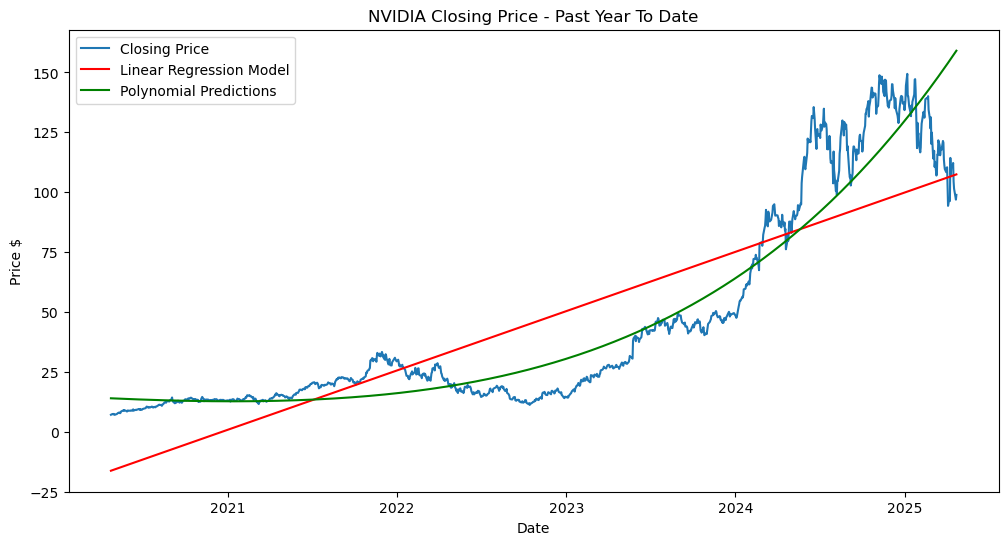

In [13]:
#
# Plot the Linear Regression, showing the actual vs predicted!
#
#

plt.figure(figsize=(12, 6 ) )
plt.plot( df['Date'], df['Close'], label='Closing Price')

#plt.axvline( classbegan, color='red', label=("Python Class Started"), linestyle='--')
#plt.axhline( mypurchaseprice, color='green', label=("Price I Paid"), linestyle='--')


plt.plot( df['Date'], predictions, label="Linear Regression Model", color='red' )
plt.plot(df['Date'], y_poly_predictions, label='Polynomial Predictions', color='green')

plt.title("NVIDIA Closing Price - Past Year To Date")
plt.xlabel("Date")
plt.ylabel("Price $")
plt.legend()
plt.show()


In [14]:

def CreateStockFeatures( my_stock_data):
    """ 
    Create a new dataframe from the input dataframe, add columns for rolling means of closing prices
    and standaard deviation of closing prices

    Args:
        Source Dataframe obtained from Yahoo Finance
    Returns:
      A Paandas dataframe with new columns of dayofyear, dayofmonth, last_week_rolling_mean, last_4week_rolling_mean, last_2day_rolling_mean, last_week_rolling_std, last_4week_rolling_std, last_2day_rolling_std
    Caveats:
      The resulting dataframe does not contain NaN values. They are filled using the method='bfill'AdvancedModels.ipynb
    """
    featuredf = my_stock_data.copy()

  #  featuredf['dayofweek'] = featuredf['Date'].dt.day
  #  featuredf['quarter'] = featuredf.index.quarter
  #  featuredf['month'] = featuredf.index.month
    featuredf['dayofyear'] = featuredf['Date'].dt.dayofyear
    featuredf['dayofmonth']= featuredf['Date'].dt.day

    featuredf['last_week_rolling_mean'] = df['Close'].rolling(window=7).mean()
    featuredf['last_4week_rolling_mean'] = df['Close'].rolling(window=28).mean()
    featuredf['last_2day_rolling_mean'] = df['Close'].rolling(window=2).mean()

    featuredf['last_week_rolling_std'] = df['Close'].rolling(window=7).std()
    featuredf['last_4week_rolling_std'] = df['Close'].rolling(window=28).std() 
    featuredf['last_2day_rolling_std'] = df['Close'].rolling(window=2).std() 

    featuredf.fillna(method='bfill', inplace=True)


    return featuredf

In [15]:
#
# How about a different model
# One that uses even MORE CPU?
#
#
# Random Forest....
#

my_stock_features = CreateStockFeatures(df)


cool_feature_columns = ['last_week_rolling_mean','last_4week_rolling_mean','last_week_rolling_std','last_4week_rolling_std', 'last_2day_rolling_mean', 'last_2day_rolling_std']
#cool_feature_columns = ['last_week_rolling_mean','last_4week_rolling_mean']


modelrf = RandomForestRegressor( n_estimators=5, random_state=42)
modelrf.fit(my_stock_features[cool_feature_columns], my_stock_features['Close'] )

rf_predictions = modelrf.predict( my_stock_features[ cool_feature_columns]   )



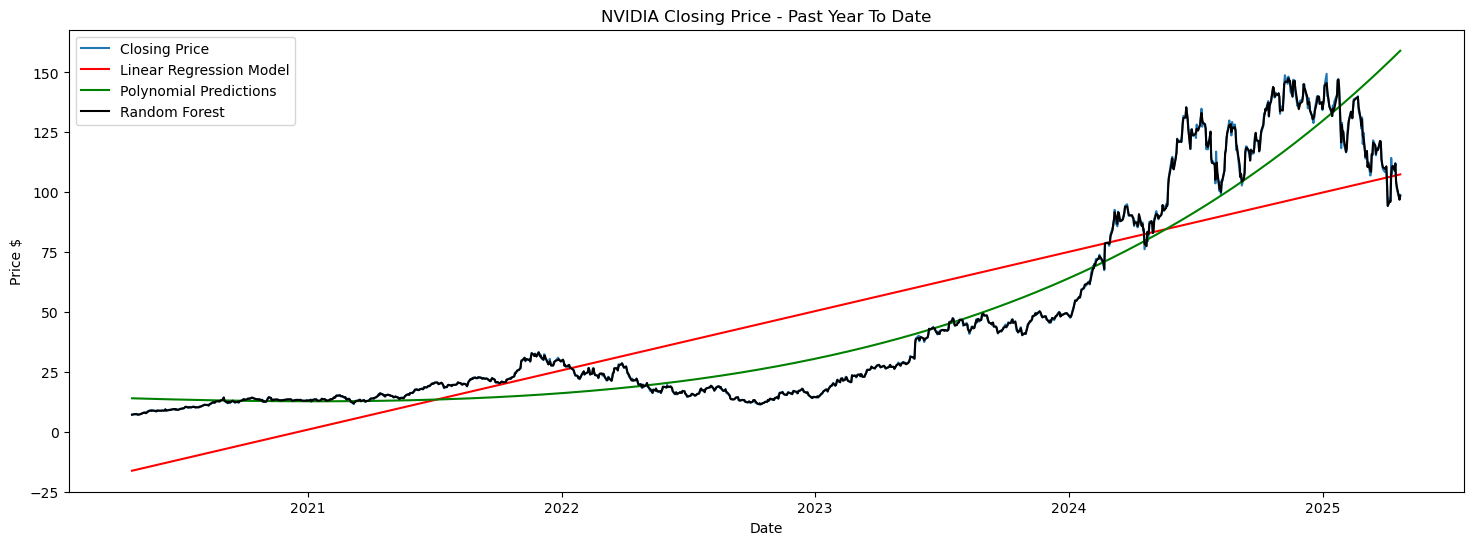

In [16]:
#
# Plot the Linear Regression, showing the actual vs predicted!
# The PolyFit
# and Random Forest

plt.figure(figsize=(18, 6 ) )
plt.plot( df['Date'], df['Close'], label='Closing Price')

plt.plot( df['Date'], predictions, label="Linear Regression Model", color='red' )
plt.plot( df['Date'], y_poly_predictions, label='Polynomial Predictions', color='green')
plt.plot( df['Date'],  rf_predictions, label="Random Forest", color='black'  )


plt.title("NVIDIA Closing Price - Past Year To Date")
plt.xlabel("Date")
plt.ylabel("Price $")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

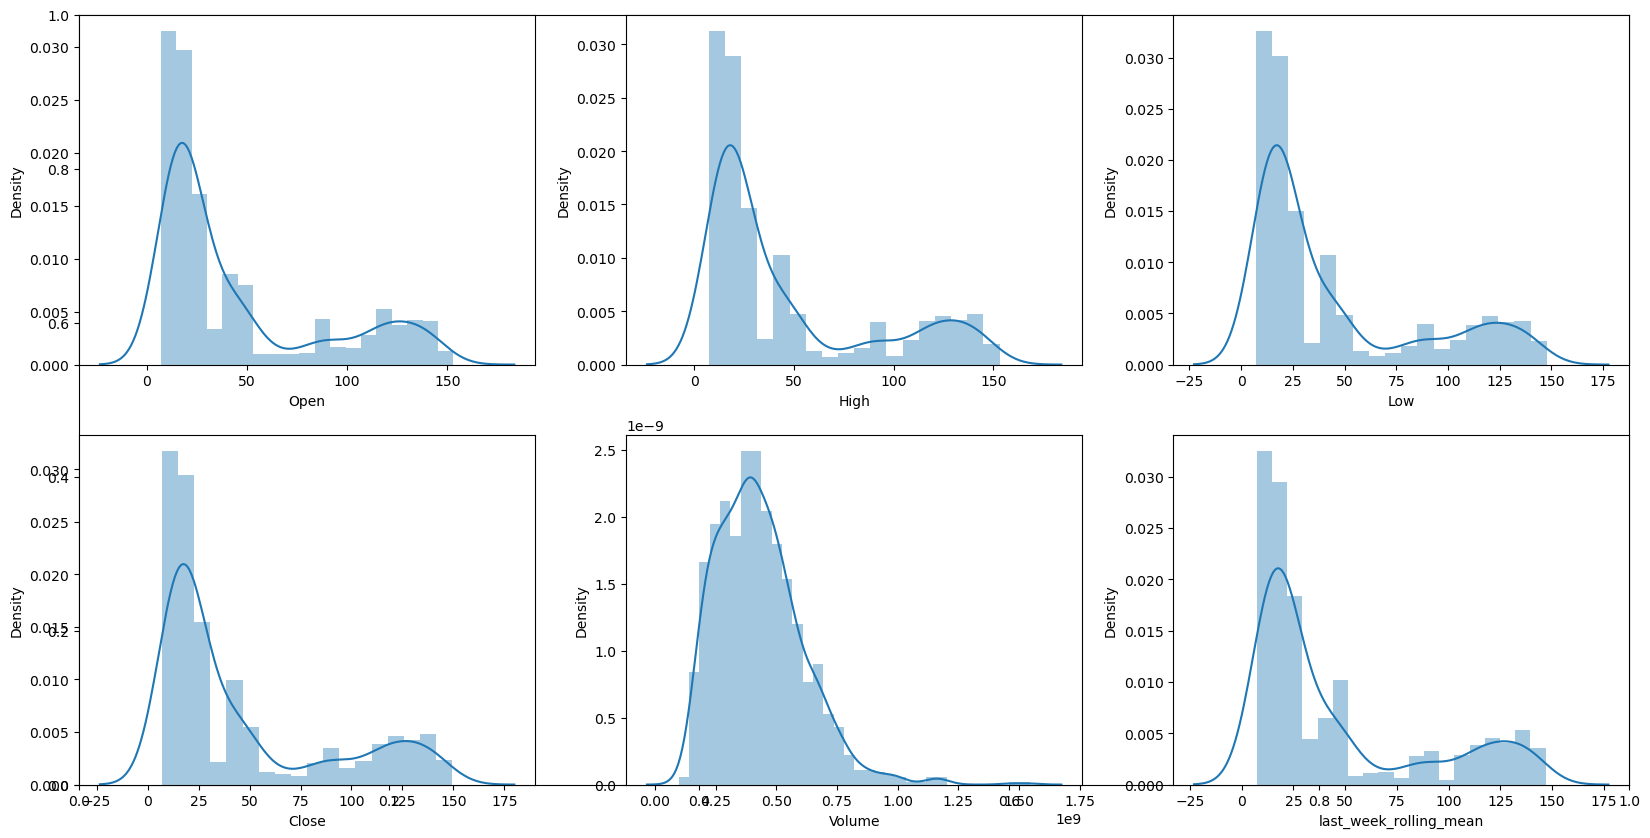

In [45]:
#
# Let's plot each "feature" in a series of subplots to visualize them
#
#
features_to_plot = ['Open', 'High', 'Low', 'Close', 'Volume', 'last_week_rolling_mean']

plt.subplots(figsize=(20,10))

for index, col in enumerate(features_to_plot):
    plt.subplot(2,3,index+1)
    sb.distplot( my_stock_features[col])
plt.show



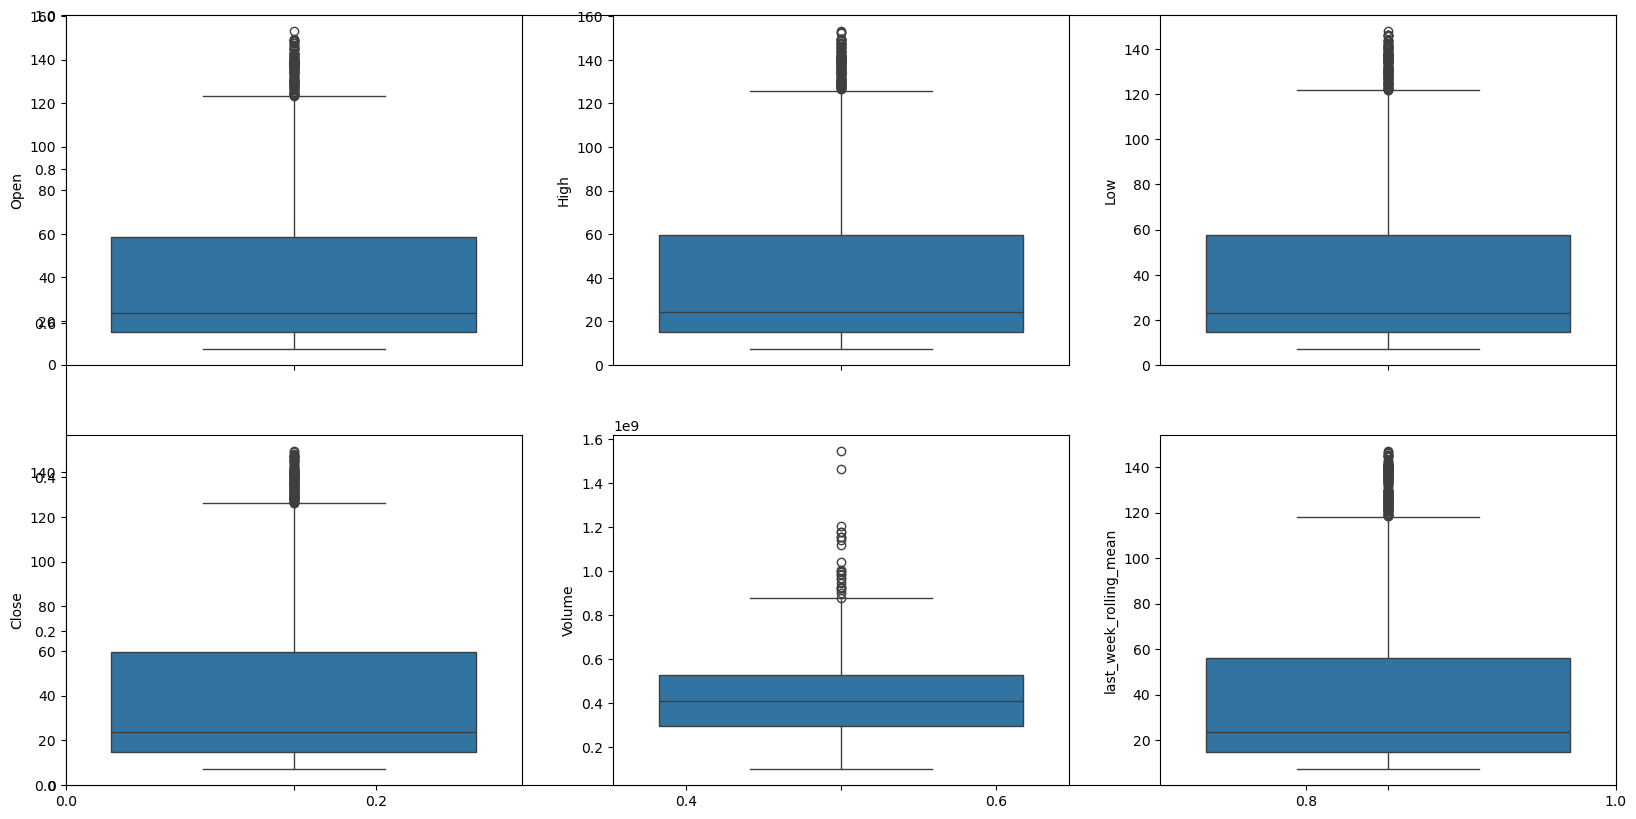

In [46]:
#
# Inspecting those histograms shows that volume (trading volume) is left skewed 
#  and there aare two peaks in the distributions. 
#
plt.subplots(figsize=(20,10))
for index, col in enumerate(features_to_plot):
  plt.subplot(2,3,index+1)
  sb.boxplot(my_stock_features[col])
plt.show()

In [47]:
#
# Feature Engineering
#
# Let's derive additional features from existing ones (calculate, categorical/etc)
#
my_stock_features['day'] = my_stock_features['Date'].dt.day
my_stock_features['month'] = my_stock_features['Date'].dt.month
my_stock_features['year'] = my_stock_features['Date'].dt.year


In [59]:
# Do the days leading up to a quarter end affect stock price
# IE: Anticipation of earnings / performance reports/ outlook???

my_stock_features['is_quarter_end'] = np.where(my_stock_features['month'] %3 ==0, 1, 0)                            

In [77]:
#
# Should I Buy?
#
#
#
my_stock_features['open-close'] = my_stock_features['Open'] - my_stock_features['Close']
my_stock_features['low-high'] =  my_stock_features['Low'] - my_stock_features['High']

my_stock_features['shouldibuy'] = np.where(  ( my_stock_features['Close'].shift(-1) * 0.98) > my_stock_features['Close'] 
                                           
                                           
                                           
                                                , 1 , 0)

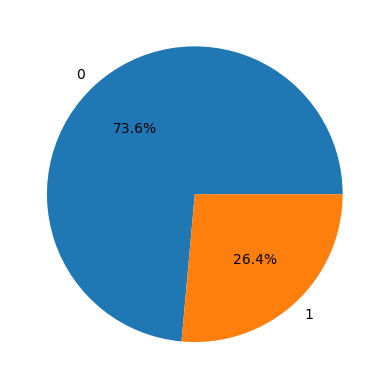

In [78]:
#
# We need to see if shouldibuy is balanced......
#
plt.pie(my_stock_features['shouldibuy'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

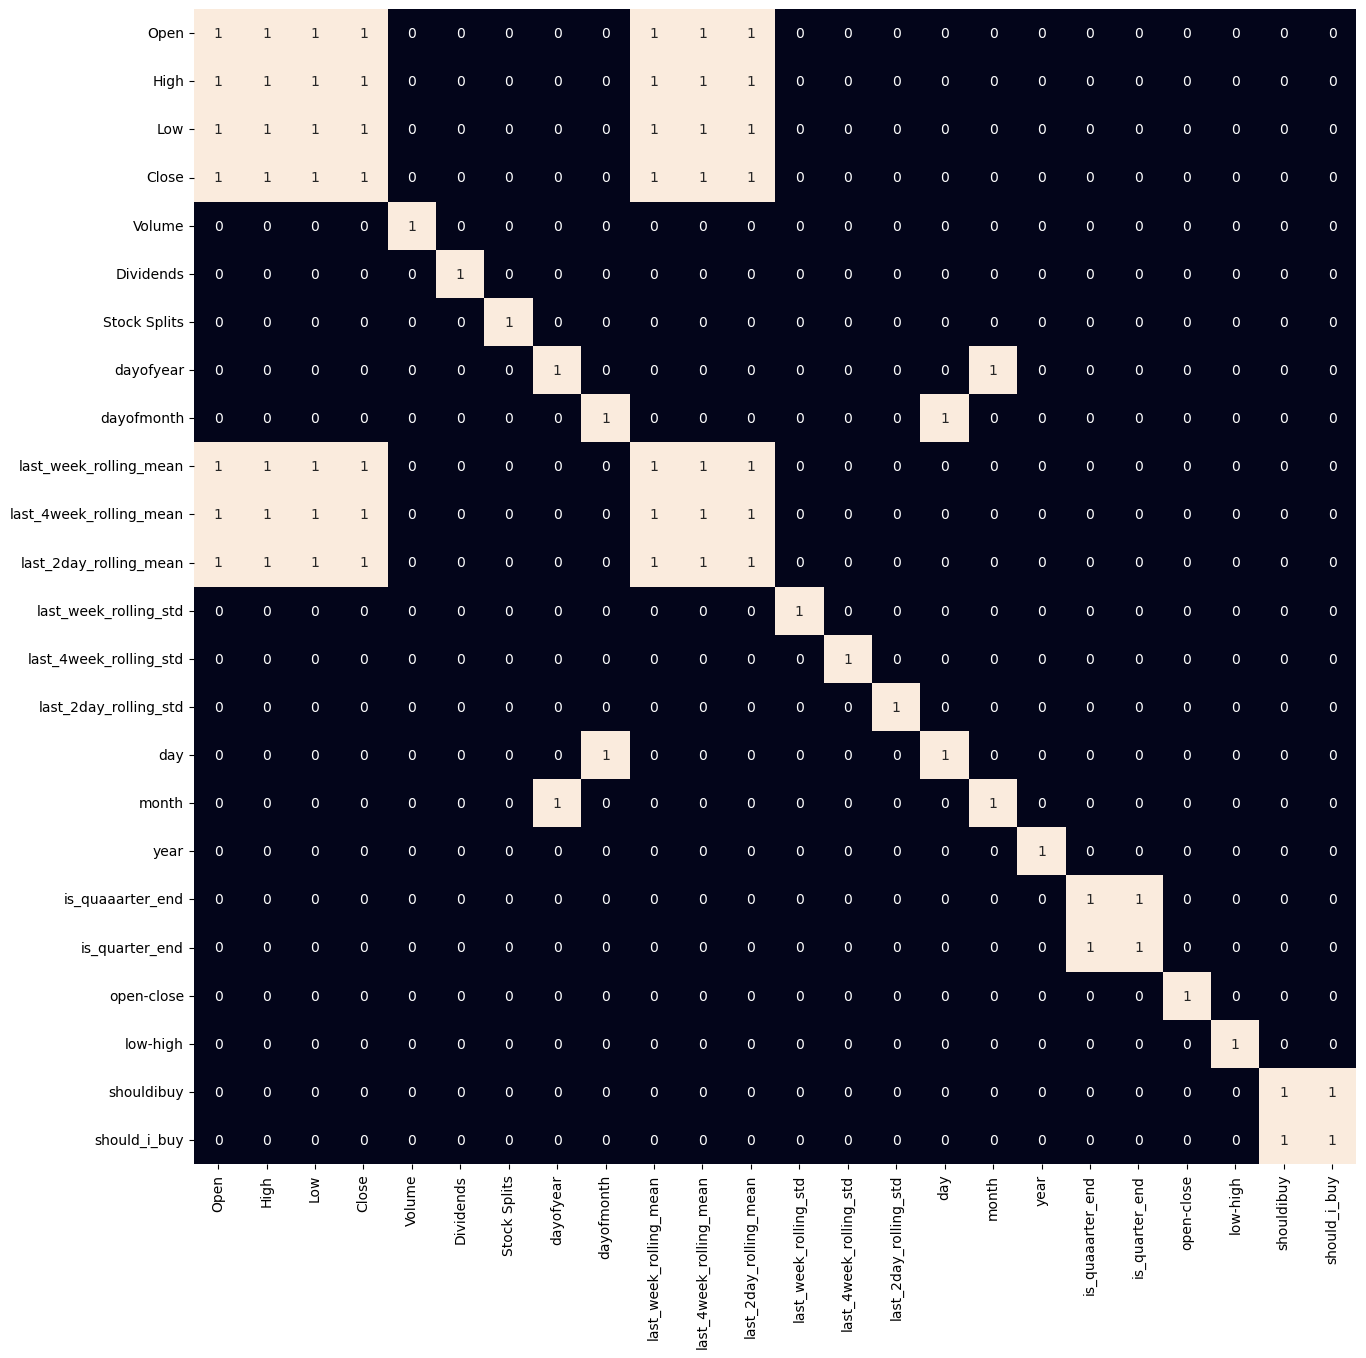

In [57]:
#
# We do NOT want to choose highly-coorelated features
#
#
#
plt.figure(figsize=(15, 15)) 
sb.heatmap( my_stock_features.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False    )
plt.show



In [79]:
#
# Split and normalize our data before we give it to a ML Model
#
#
features = my_stock_features[ ['open-close', 'low-high', 'is_quarter_end']]
#features = my_stock_features[ ['open-close', 'low-high']]

target = my_stock_features['shouldibuy']

scaler = StandardScaler()
features = scaler.fit_transform( features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1)
print(X_train.shape, X_valid.shape)

(1130, 3) (126, 3)


In [ ]:
#
# Now the Machine Learning Part.
#
# We going use LogicalRegression
# Support Vector Machine
# AUC-ROC Curve to evaluate our model
#
# TPR ( True Positive Rate)  <- ratio of correctly predicted postive instaces
# FPR ( False Postive Rate)  <- ratio of incorrectly predicted negative instaces
#
# Specificity            : The proportion of actual negatives correctly identified by the model (inverse of FPR).
# Sensitivity  /   Recall: The proportion of actual positives correctly identified by the model (same as TPR).


In [80]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()



LogisticRegression() : 
Training Accuracy :  0.54544556858905
Validation Accuracy :  0.6237041188007846

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4940402964011372
Validation Accuracy :  0.4844494256094144

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Ac

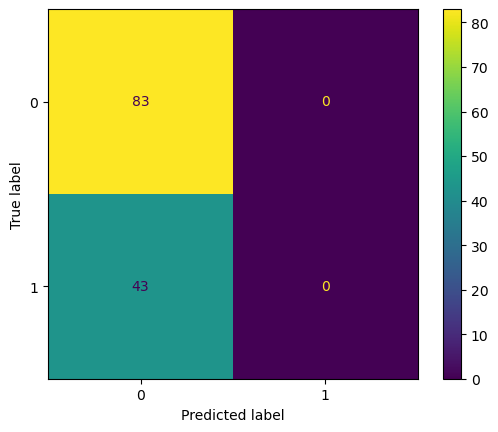

In [81]:
#
# Looking at the confusion matrix, we should have an answer regarding our buy decision from the model
#
#

ConfusionMatrixDisplay.from_estimator( models[0], X_valid, Y_valid)
plt.show()







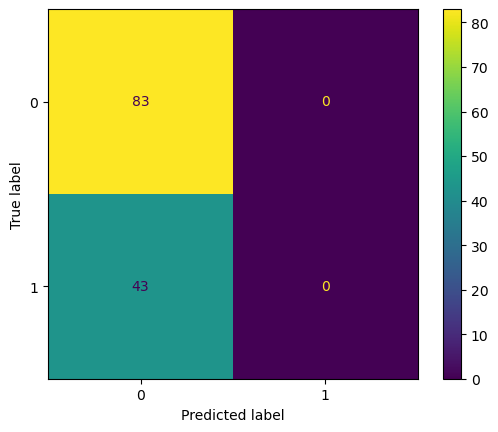

In [82]:
ConfusionMatrixDisplay.from_estimator( models[1], X_valid, Y_valid)
plt.show()


In [70]:
from sklearn.metrics import confusion_matrix

Third = XGBClassifier()
Third = models[2]





